In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
airline=pd.read_csv('airline_passengers.csv')

In [10]:
airline['Month']=pd.to_datetime(airline.Month)

In [13]:
airline.set_index('Month',inplace=True)

In [15]:
airline.sample(5)

,Thousands of Passengers
Month,
1956-09-01,355
1954-06-01,264
1953-09-01,237
1957-12-01,336
1956-12-01,306


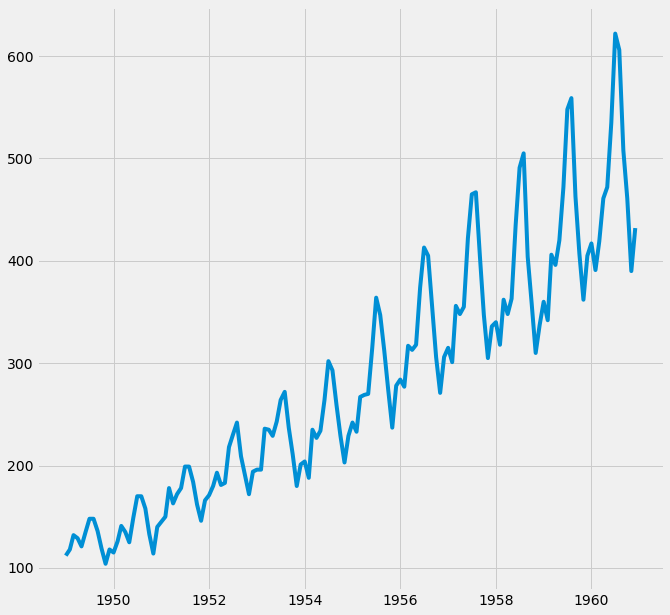

In [52]:
plt.figure(figsize=(10,10))
plt.plot(airline)
plt.show()

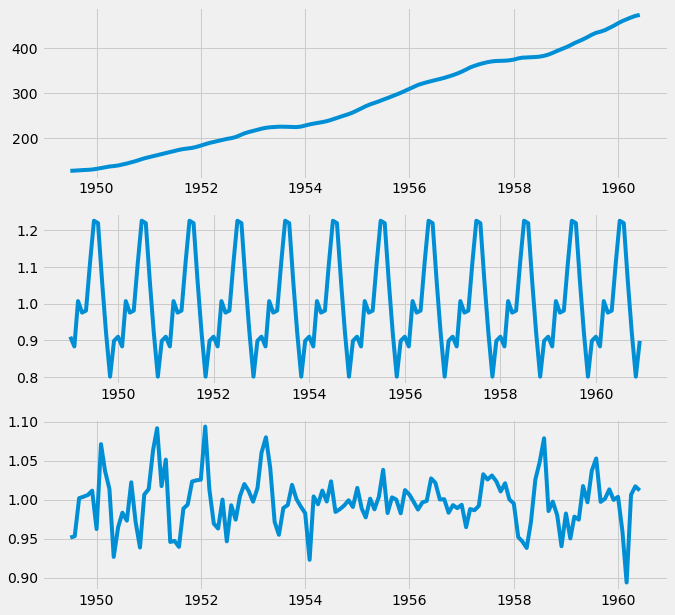

In [53]:
result=seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(result.trend,label='Trend')
plt.subplot(3,1,2)
plt.plot(result.seasonal,label='Seasonality')
plt.subplot(3,1,3)
plt.plot(result.resid,label='Error')
plt.show()

In [54]:
airline.columns=['Vol_k']

In [58]:
# Adding simple moving averages and exponential moving averages
airline['6_month_SMA']=airline.Vol_k.rolling(window=6).mean()
airline['12_month_SMA']=airline.Vol_k.rolling(window=12).mean()
airline['ewma']=airline.Vol_k.ewm(span=12,adjust=False).mean()

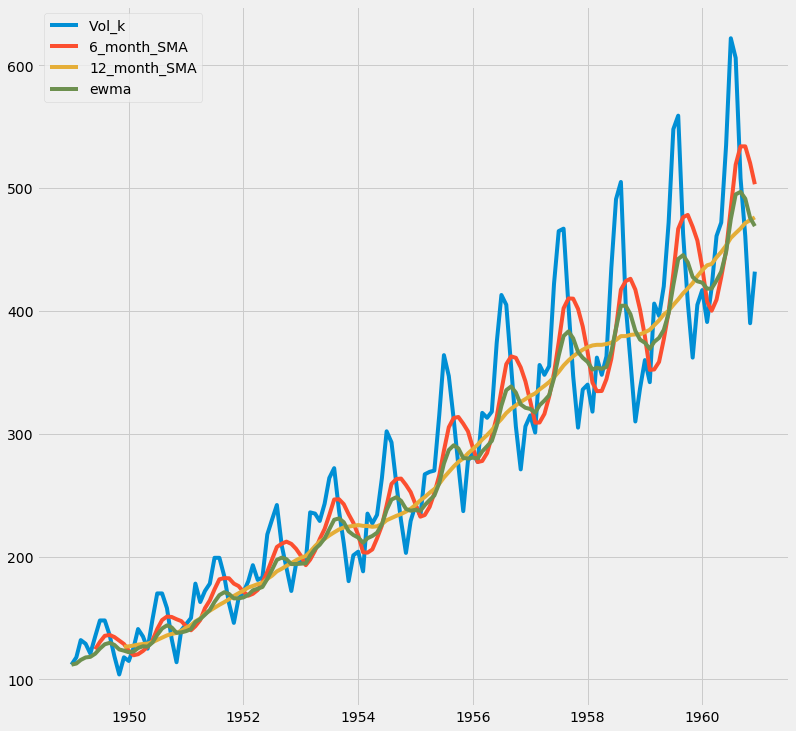

In [63]:
# Plotting the moving averages against each other
plt.figure(figsize=(12,12))
plt.plot(airline)
plt.legend(labels=airline.columns)
plt.show()